In [1]:
import matplotlib.pyplot as plt
import mlutils
%matplotlib inline
!pip install google_images_download

## We use google image search to have labeled images automatically!!!

ref https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html


### download images from two google queries

In [56]:
# -------------------------------------------------------
#      SET YOUR DATASET PARAMETERS
# -------------------------------------------------------
query1 = "motorbike"
query2 = "car"
train_pct = .7
n_images = 50
# -------------------------------------------------------

In [ ]:

downloads = "/tmp/downloads"
traintest_imgs = "/tmp/imgs"

mlutils.search_google_build_dataset_stage1(query1, query2, train_pct, n_images, downloads, traintest_imgs)
!googleimagesdownload --config_file $downloads/cfg.txt
mlutils.search_google_build_dataset_stage2(query1, query2, train_pct, n_images, downloads, traintest_imgs)

In [58]:
# -------------------------------------------------------
#      SET YOUR MODEL PARAMETERS
# -------------------------------------------------------
img_size = 32
batch_size = 5
n_epochs   = 10

### visually check the images

see [ImageGenerator](https://keras.io/preprocessing/image/)

Found 67 images belonging to 2 classes.


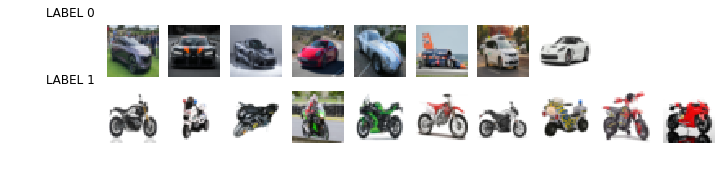

In [59]:
mlutils.show_image_sample(traintest_imgs, img_size)

### train keras!!!

In [60]:
import tensorflow as tf
def get_conv_model_A(num_classes=2, img_size=32, compile=True):
    tf.reset_default_graph()
    tf.keras.backend.clear_session()
    print ("using",num_classes,"classes")
    inputs = tf.keras.Input(shape=(img_size,img_size,3), name="input_1")
    layers = inputs
    layers = tf.keras.layers.Conv2D(15,(5,5), activation="relu")(layers)
    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(64, activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dropout(0.6)(layers)
    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    if compile:
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model

In [61]:

model = get_conv_model_A(num_classes=2, img_size=img_size)

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(rescale=1./255, fill_mode='nearest')
train_generator_fn = lambda: datagen.flow_from_directory(
        traintest_imgs+"/train",  # this is the target directory
        target_size=(img_size, img_size),  # all images will be resized to 150x150
        batch_size=batch_size,
        interpolation = "bilinear",
        class_mode='binary') 

test_generator_fn = lambda: datagen.flow_from_directory(
        traintest_imgs+"/test",  # this is the target directory
        target_size=(img_size, img_size),  # all images will be resized to 150x150
        batch_size=batch_size,
        interpolation = "bilinear",
        class_mode='binary') 

model.fit_generator(
        train_generator_fn(),
        steps_per_epoch=1000 // batch_size,
        epochs=n_epochs,
        validation_data=test_generator_fn(),
        validation_steps=400 // batch_size)


using 2 classes
Found 67 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Epoch 1/10
14/14 [==============================] - 4s 318ms/step - loss: 0.9178 - acc: 0.5373 - val_loss: 0.6602 - val_acc: 0.7667
Epoch 2/10
14/14 [==============================] - 3s 218ms/step - loss: 0.6460 - acc: 0.6716 - val_loss: 0.6031 - val_acc: 0.8000
Epoch 3/10
14/14 [==============================] - 3s 230ms/step - loss: 0.5725 - acc: 0.6567 - val_loss: 0.5083 - val_acc: 0.8667
Epoch 4/10
14/14 [==============================] - 3s 228ms/step - loss: 0.3955 - acc: 0.9104 - val_loss: 0.5203 - val_acc: 0.7000
Epoch 5/10
14/14 [==============================] - 3s 225ms/step - loss: 0.4153 - acc: 0.8358 - val_loss: 0.4589 - val_acc: 0.7333
Epoch 6/10
14/14 [==============================] - 3s 230ms/step - loss: 0.2865 - acc: 0.8657 - val_loss: 0.4007 - val_acc: 0.8333
Epoch 7/10
14/14 [==============================] - 3s 218ms/step - loss: 0.1790 - acc: 0.9403 - val_loss: 0.482

### predictions

In [62]:
def show_preds(x, preds):
    for i  in np.random.permutation(range(len(preds)))[:4]:
        plt.figure(figsize=(5,2.5))
        plt.subplot(122)
        plt.imshow(x[i])
        plt.axis("off")
        plt.subplot(121)
        plt.bar(np.arange(2), preds[i], color="blue", alpha=.5, label="prediction")
        plt.bar(np.arange(2), np.eye(2,2)[int(y[i])], color="red", alpha=.5, label="label")
        plt.xticks(range(2), range(2), rotation="vertical");
        plt.xlim(-.5,1.5);
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, +1.35),ncol=5)


Found 30 images belonging to 2 classes.


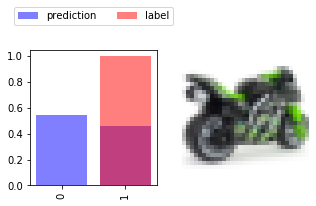

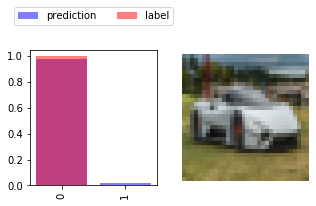

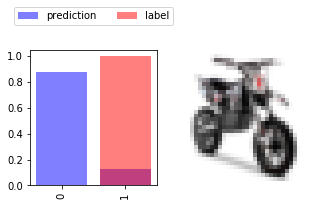

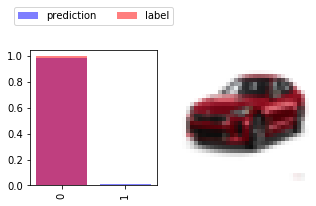

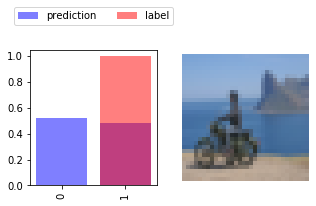

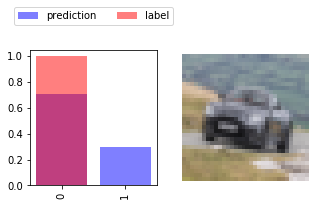

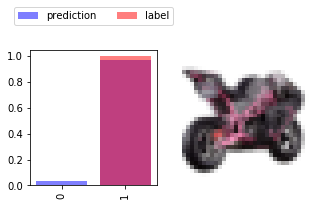

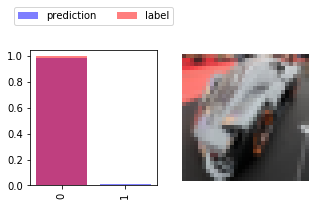

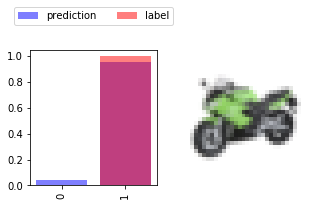

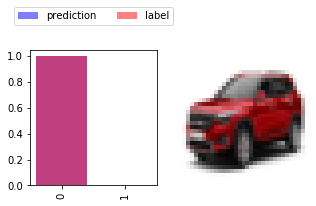

In [71]:
import numpy as np
test_generator_fn = lambda: datagen.flow_from_directory(
        traintest_imgs+"/test",  # this is the target directory
        target_size=(img_size, img_size),  # all images will be resized to 150x150
        batch_size=1,
        interpolation = "bilinear",
        class_mode='binary') 

i = 0
for x,y in test_generator_fn():
    if i>9:
        break    
    if np.random.random()>.5:
        i+=1
        preds = model.predict(x)
        mlutils.show_preds(x, y, preds)
    